## Business Understanding
- **Objective:** To gain a deeper understanding of how Artificial Neural Networks (ANNs) function and their effectiveness in classifying clothing items using the Fashion-MNIST dataset.
- **Success Criteria:** To comprehend the fundamental concepts of ANNs, including layers, activations, and training processes, and to evaluate the ANN model's performance in classifying clothing items with a accuracy rate.

## Data Understanding
- **Data Collection:** Utilize the Fashion-MNIST dataset, consisting of grayscale images of clothing items, and their corresponding labels.
- **Data Description:** The dataset comprises 60,000 training images and 10,000 test images, each of size 28x28 pixels, representing various clothing categories.
- **Data Exploration:** Visualize sample images from the dataset to understand the characteristics of clothing items and their corresponding labels.


## Data Preparation
- **Data Cleaning:** No cleaning required as the dataset is well-prepared and labeled.
- **Feature Engineering:** Normalize pixel values to the range [0, 1] and reshape images to the required format for inputting into the ANN model.


## Modelling
- **Model Selection:** I chose an ANN, suitable for image classification tasks, incorporating convolutional and dense layers.
- **Model Training:** Train the ANN model using the training images and labels, and validate its performance on the test dataset.
- **Model Evaluation:** Assess the trained model's performance metrics, including accuracy and loss, to understand its effectiveness in classifying clothing items.


# Evaluation

## Model Evaluation
The trained ANN model was evaluated on the test dataset to assess its performance.

- **Test Loss:** The test loss of the model was computed to be 0.3461.
- **Test Accuracy:** The test accuracy of the model was calculated to be 0.8901, indicating that the model correctly classified approximately 89.01% of the test images.


In [12]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt


In [13]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [14]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape the flattened images back to their original shape
train_images_flat = train_images.reshape(train_images.shape[0], 28, 28)
test_images_flat = test_images.reshape(test_images.shape[0], 28, 28)


In [15]:
# Define the neural network model
model = tf.keras.Sequential([
    # Input layer (Flatten) to convert 2D image data into 1D
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    # Fully connected (Dense) layer with 128 neurons using ReLU activation
    tf.keras.layers.Dense(128, activation='relu'),
    # Output layer with 10 neurons (one for each class) using softmax activation
    tf.keras.layers.Dense(10, activation='softmax')
])

In [16]:
# Compile the model
# Using Adam optimizer, sparse categorical crossentropy loss function, and accuracy metric
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [17]:
# Train the model
# Using training images and labels, validating on test data, for 10 epochs
history = model.fit(train_images_flat, train_labels, epochs=10, validation_data=(test_images_flat, test_labels))

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4969 - accuracy: 0.8252 - val_loss: 0.4419 - val_accuracy: 0.8443
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3734 - accuracy: 0.8654 - val_loss: 0.4229 - val_accuracy: 0.8457
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3397 - accuracy: 0.8759 - val_loss: 0.3687 - val_accuracy: 0.8676
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3126 - accuracy: 0.8859 - val_loss: 0.3938 - val_accuracy: 0.8587
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2934 - accuracy: 0.8924 - val_loss: 0.3508 - val_accuracy: 0.8719
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2793 - accuracy: 0.8969 - val_loss: 0.3449 - val_accuracy: 0.8795
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2703 - accuracy: 0.8999 - val_loss: 0.3436 - val_accuracy

In [18]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images_flat, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3311 - accuracy: 0.8834
Test accuracy: 0.883400022983551


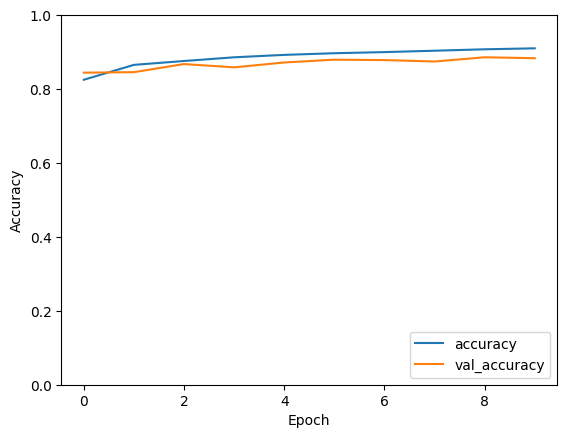

In [19]:
# Plot training history
# Plotting accuracy and validation accuracy over epochs to visualize model performance
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [21]:

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images_flat, test_labels)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

# Make predictions on the test data
predictions = model.predict(test_images_flat)

# Extract predicted labels
predicted_labels = np.argmax(predictions, axis=1)

# Display the first predicted label
print("Predicted label for the first image:", predicted_labels[0])


actual_label = test_labels[0]

# Compare with the prediction
if actual_label == predicted_labels[0]:
    print("Prediction is correct!")
else:
    print("Prediction is incorrect.")

# Display the predicted labels for the first 10 images
for i in range(10):
    print("Predicted label for image", i+1, ":", predicted_labels[i])

# Compare predictions with actual labels for the first 10 images
for i in range(10):
    if test_labels[i] == predicted_labels[i]:
        print("Prediction for image", i+1, "is correct!")
    else:
        print("Prediction for image", i+1, "is incorrect.")


313/313 [==============================] - 1s 2ms/step - loss: 0.3461 - accuracy: 0.8901
Test loss: 0.3460824489593506
Test accuracy: 0.8901000022888184
313/313 [==============================] - 1s 2ms/step
Predicted label for the first image: 9
Prediction is correct!
Predicted label for image 1 : 9
Predicted label for image 2 : 2
Predicted label for image 3 : 1
Predicted label for image 4 : 1
Predicted label for image 5 : 6
Predicted label for image 6 : 1
Predicted label for image 7 : 4
Predicted label for image 8 : 6
Predicted label for image 9 : 5
Predicted label for image 10 : 7
Prediction for image 1 is correct!
Prediction for image 2 is correct!
Prediction for image 3 is correct!
Prediction for image 4 is correct!
Prediction for image 5 is correct!
Prediction for image 6 is correct!
Prediction for image 7 is correct!
Prediction for image 8 is correct!
Prediction for image 9 is correct!
Prediction for image 10 is correct!
